In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Let's create a dataset
from sklearn.datasets import make_circles

# Set samples to 1000
n_samples = 1000

# Features and labels
X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

In [6]:
X, y[:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64))

In [7]:
# Let's visualize the data using pandas DataFrame
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [10]:
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

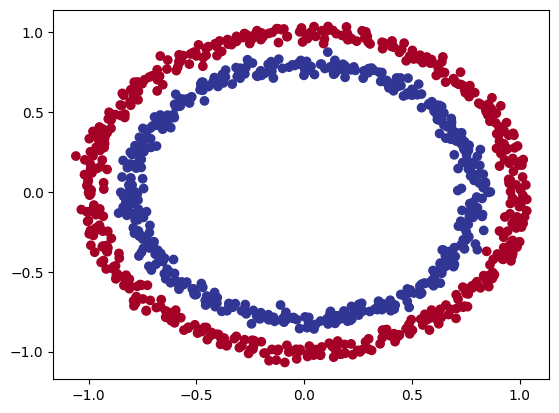

In [9]:
# Plot the data
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)


In [24]:
# Let's build a model with 2 input layer, 1 output layer, 200 epochs and adam optimizer

# Set random seed
tf.random.set_seed(42)

# 1. Create a model 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile a model
model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

# 3. Fit the model
model.fit(X,y,epochs=200,verbose=1)

Epoch 1/200
32/32 [==============================] - 0s 829us/step - loss: 3.3363 - accuracy: 0.4480
Epoch 2/200
32/32 [==============================] - 0s 839us/step - loss: 0.7293 - accuracy: 0.4710
Epoch 3/200
32/32 [==============================] - 0s 796us/step - loss: 0.6973 - accuracy: 0.4710
Epoch 4/200
32/32 [==============================] - 0s 787us/step - loss: 0.6949 - accuracy: 0.4880
Epoch 5/200
32/32 [==============================] - 0s 698us/step - loss: 0.6950 - accuracy: 0.4900
Epoch 6/200
32/32 [==============================] - 0s 752us/step - loss: 0.6953 - accuracy: 0.4570
Epoch 7/200
32/32 [==============================] - 0s 796us/step - loss: 0.6949 - accuracy: 0.5260
Epoch 8/200
32/32 [==============================] - 0s 804us/step - loss: 0.6954 - accuracy: 0.4990
Epoch 9/200
32/32 [==============================] - 0s 710us/step - loss: 0.6971 - accuracy: 0.4890
Epoch 10/200
32/32 [==============================] - 0s 778us/step - loss: 0.6947 - accura

In [25]:
model.evaluate(X,y)

32/32 [==============================] - 0s 163us/step - loss: 0.6935 - accuracy: 0.4420


[0.6935381889343262, 0.44200000166893005]

To visualize our model's predictions, let's create a function 'plot_decision_boundary()', this funcion will:

* Take in a trained model, features (X) and labels (y).
* Create a meshgrid of the different X values 
* Make predictions across the meshgrid
* Plot he predictions as well as a line between zones (where each unique class falls)

In the context of programming and mathematics, a meshgrid is a way to create a grid of coordinates from given vectors. It is often used in various numerical and visualization tasks, particularly in plotting functions of two or more variables.

Given two one-dimensional arrays or vectors, x and y, a meshgrid generates two-dimensional arrays representing all possible combinations of coordinates between the elements of x and y.

For example, suppose we have the following x and y arrays:

x = [1, 2, 3]
y = [10, 20]


X = [[1, 2, 3],
     [1, 2, 3]]

Y = [[10, 10, 10],
     [20, 20, 20]]


The arrays X and Y represent the Cartesian product of the elements in x and y, where each element of x is paired with each element of y. This allows us to evaluate functions over a grid of points.

Meshgrid is often used in various plotting tasks, such as creating contour plots, surface plots, or visualizing functions of two variables. By evaluating the function at each coordinate in the meshgrid ((X[i, j], Y[i, j])), we can then plot the function's values in a two-dimensional representation.

In [26]:
import numpy as np

In [27]:
def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X.
    """
    
    # Define the axis boundaries of the plot and create a meshgrid
    
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Create X values( we're going to make predictions on these)
    
    x_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2D arrays together
    
    # Make predictions
    y_pred = model.predict(x_in)
    
    # Check for multi-class
    if len(y_pred[0]) > 1:
        print("Doing multiclass classificaion")
        
        # We have to reshape our prediction to get them ready for plotting 
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("Doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
        
    # Plot the decision boundary
    
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 537us/step
Doing binary classification


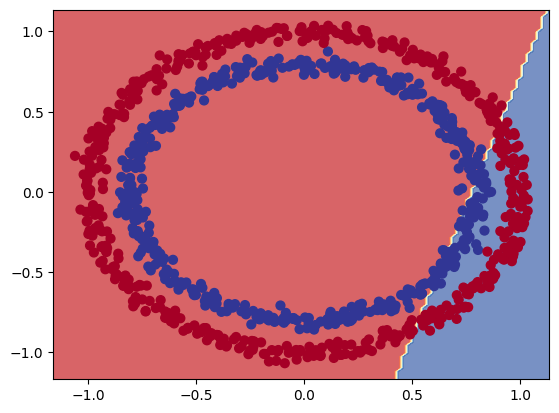

In [28]:
# Checkout the predictions our model is making
plot_decision_boundary(model=model,
                       X=X,
                       y=y)

In [15]:
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

x_min, x_max, y_min, y_max

(-1.1595024599098636,
 1.1337117525463374,
 -1.1677683182718437,
 1.1360036756154805)

In [18]:
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

xx, yy

(array([[-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        ...,
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175]]),
 array([[-1.16776832, -1.16776832, -1.16776832, ..., -1.16776832,
         -1.16776832, -1.16776832],
        [-1.14449789, -1.14449789, -1.14449789, ..., -1.14449789,
         -1.14449789, -1.14449789],
        [-1.12122747, -1.12122747, -1.12122747, ..., -1.12122747,
         -1.12122747, -1.12122747],
        ...,
        [ 1.08946283,  1.08946283,  1.08946283, ...,  